# target variable = Numeric

In [33]:
import warnings
warnings.filterwarnings("ignore") 

### Data Import

In [34]:
import pandas as pd
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
### Split my target variable
Ind_Var = company.iloc[:,1:11]
Target_Var = company.iloc[:,0]

In [36]:
Ind_Var.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes


In [37]:
Target_Var.head(1)

0    9.5
Name: Sales, dtype: float64

In [38]:
df = company.copy()

### EDA

In [39]:
df.shape

(400, 11)

In [40]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [42]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [43]:
df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


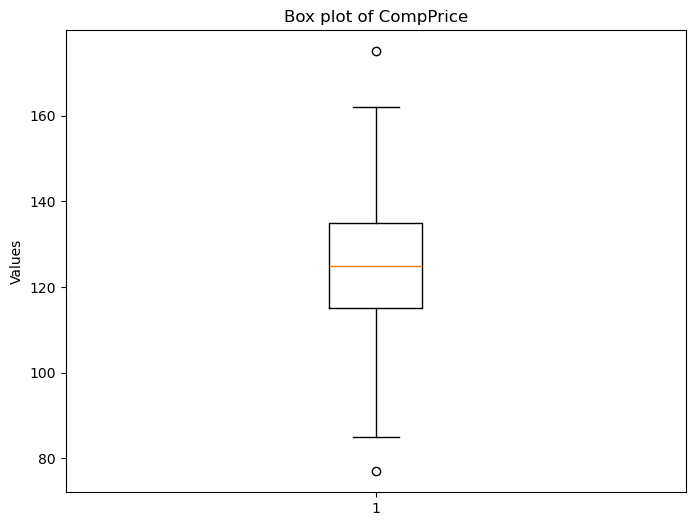

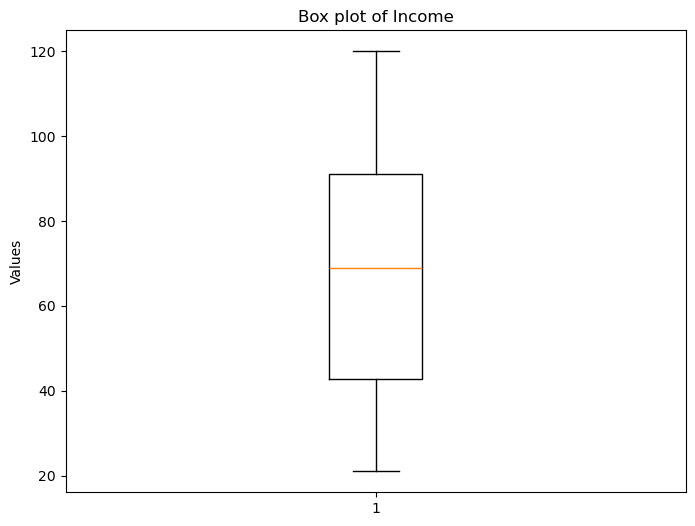

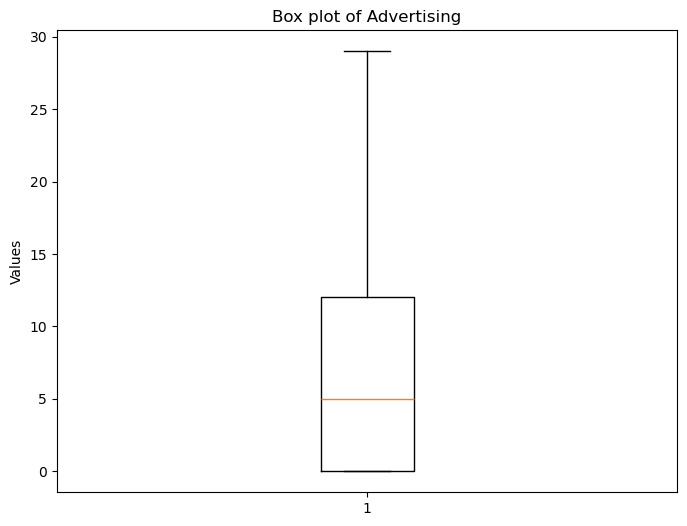

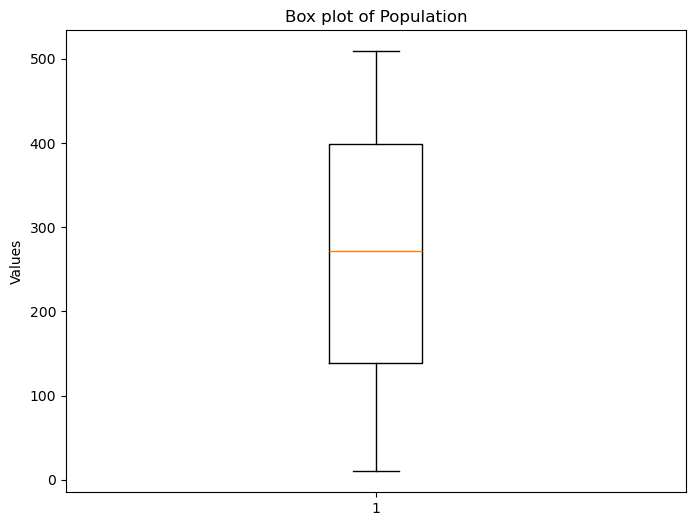

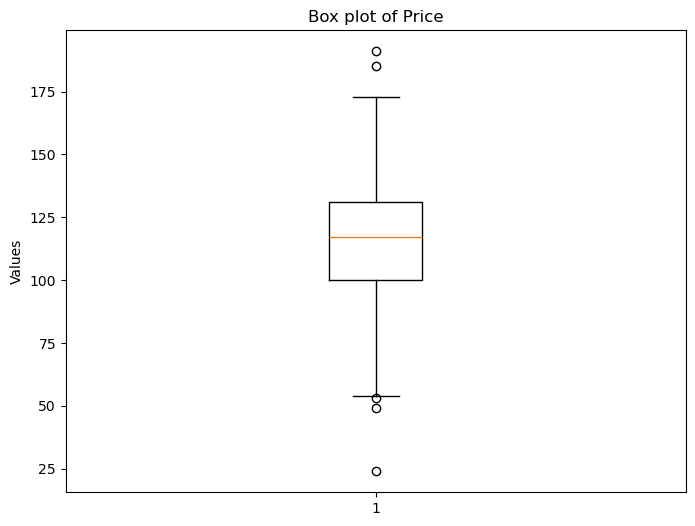

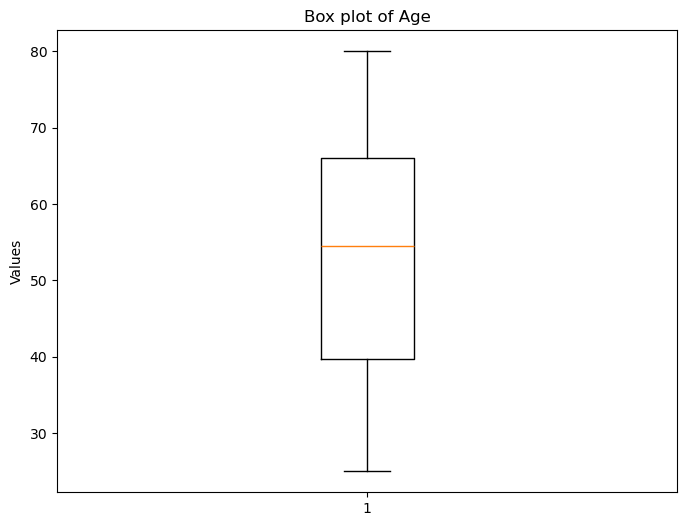

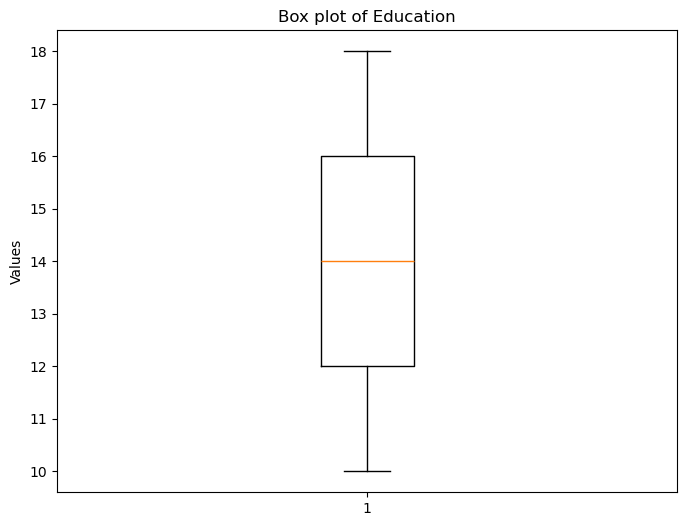

In [44]:
import matplotlib.pyplot as plt 
a = df[["CompPrice","Income","Advertising","Population","Price","Age","Education"]]
for column in a.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(a[column])
    plt.title('Box plot of {}'.format(column))
    plt.ylabel('Values')
    plt.show()

In [45]:
for col in df.columns:
    if df[col].dtype == 'object':
        print("ColName  ", col," DataType====",df[col].dtype,company[col].unique())

ColName   ShelveLoc  DataType==== object ['Bad' 'Good' 'Medium']
ColName   Urban  DataType==== object ['Yes' 'No']
ColName   US  DataType==== object ['Yes' 'No']


### Lable Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        # Apply label encoding to the column
        df[col] = le.fit_transform(df[col])

In [47]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


### Split dataset into x and y

In [48]:
x = df.iloc[:,1:11]
y = df.iloc[:,0]

### Scalling of Dataset 

In [49]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x = SS.fit_transform(x)

In [50]:
x

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

### Numpy Data convert into Pandas Dataframe 

In [51]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925


In [52]:
x.columns = list(Ind_Var)
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925


### Split the data into training and testing sets

In [28]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 10), (280,), (120, 10), (120,))

### Model -1 

In [63]:
### Decision Tree Regresser with 'squared error'
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Fit the model using Decision Tree for training samples
model = DecisionTreeRegressor(criterion='squared_error')
model.fit(x_train, y_train)

# Calculate the training and testing mse
mse_train_error = mean_squared_error(y_train, model.predict(x_train))
mse_test_error  = mean_squared_error(y_test, model.predict(x_test))

# Print the training and testing error
print("Training RMSE error:", np.sqrt(mse_train_error))
print("Testing RMSE error:", np.sqrt(mse_test_error))
print("")
print("Training R2 Score:", r2_score(y_train, model.predict(x_train)))
print("Testing R2 Score:", r2_score(y_test, model.predict(x_test)))

Training RMSE error: 0.0
Testing RMSE error: 0.5477225575051661

Training R2 Score: 1.0
Testing R2 Score: -0.20839160839160842


In [30]:
#Get the number of nodes in the tree
num_nodes = model.tree_.node_count
# Get the depth of the tree
max_depth = model.tree_.max_depth

# Print the number of nodes and depth of the tree
print("Number of nodes:", num_nodes)
print("Depth of the tree:", max_depth)

Number of nodes: 559
Depth of the tree: 17


### Improving model=1 with max_depth parameter

In [31]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 15)
model.fit(x_train, y_train)

# Calculate the training and testing mse
mse_train_error = mean_squared_error(y_train, model.predict(x_train))
mse_test_error  = mean_squared_error(y_test, model.predict(x_test))

print("Training RMSE error:", np.sqrt(mse_train_error))
print("Testing RMSE error:", np.sqrt(mse_test_error))
print("")
print("Training R2 Score:", r2_score(y_train, model.predict(x_train)))
print("Testing R2 Score:", r2_score(y_test, model.predict(x_test)))

Training RMSE error: 0.004952152009360133
Testing RMSE error: 2.5587386939083294

Training R2 Score: 0.9999968005939355
Testing R2 Score: 0.22790914783374283


In [32]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 13)
model.fit(x_train, y_train)

# Calculate the training and testing mse
mse_train_error = mean_squared_error(y_train, model.predict(x_train))
mse_test_error  = mean_squared_error(y_test, model.predict(x_test))

print("Training RMSE error:", np.sqrt(mse_train_error))
print("Testing RMSE error:", np.sqrt(mse_test_error))
print("")
print("Training R2 Score:", r2_score(y_train, model.predict(x_train)))
print("Testing R2 Score:", r2_score(y_test, model.predict(x_test)))

Training RMSE error: 0.07885754183819015
Testing RMSE error: 2.4771614673220608

Training R2 Score: 0.9991887253617203
Testing R2 Score: 0.27635566727221406


In [33]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth= 10)
model.fit(x_train, y_train)

# Calculate the training and testing mse
mse_train_error = mean_squared_error(y_train, model.predict(x_train))
mse_test_error  = mean_squared_error(y_test, model.predict(x_test))

print("Training RMSE error:", np.sqrt(mse_train_error))
print("Testing RMSE error:", np.sqrt(mse_test_error))
print("")
print("Training R2 Score:", r2_score(y_train, model.predict(x_train)))
print("Testing R2 Score:", r2_score(y_test, model.predict(x_test)))

Training RMSE error: 0.32232927704466446
Testing RMSE error: 2.526589732587703

Training R2 Score: 0.9864455800330243
Testing R2 Score: 0.2471889461259451


## Improve my model with ensemble technique

###  BaggingRegressor

In [35]:
from sklearn.ensemble import BaggingRegressor
train_error =[]
test_error = []
train_r2 = []
test_r2 = []
for i in range(1,500,1):
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, max_features=0.7,max_samples=0.6,random_state=i)
    bag_reg.fit(x_train, y_train)
    train_error.append(mean_squared_error(y_train, bag_reg.predict(x_train)))
    test_error.append(mean_squared_error(y_test, bag_reg.predict(x_test)))
    train_r2.append(r2_score(y_train, bag_reg.predict(x_train)))
    test_r2.append(r2_score(y_test, bag_reg.predict(x_test)))

print("Training RMSE error:", np.mean(np.sqrt(train_error)))
print("Testing RMSE error:", np.mean(np.sqrt(test_error)))
print("")
print("Training R2 Score:", np.mean(train_r2))
print("Testing R2 Score:", np.mean(test_r2))

Training RMSE error: 1.015471042655734
Testing RMSE error: 1.8886938034127763

Training R2 Score: 0.8654171778107093
Testing R2 Score: 0.5791416019677098


In [36]:
from sklearn.ensemble import BaggingRegressor
train_error =[]
test_error = []
train_r2 = []
test_r2 = []
for i in range(1,500,1):
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=500, max_features=0.7,max_samples=0.6,random_state=i)
    bag_reg.fit(x_train, y_train)
    train_error.append(mean_squared_error(y_train, bag_reg.predict(x_train)))
    test_error.append(mean_squared_error(y_test, bag_reg.predict(x_test)))
    train_r2.append(r2_score(y_train, bag_reg.predict(x_train)))
    test_r2.append(r2_score(y_test, bag_reg.predict(x_test)))

print("Training RMSE error:", np.mean(np.sqrt(train_error)))
print("Testing RMSE error:", np.mean(np.sqrt(test_error)))
print("")
print("Training R2 Score:", np.mean(train_r2))
print("Testing R2 Score:", np.mean(test_r2))

Training RMSE error: 0.9997694099204382
Testing RMSE error: 1.8765457028830943

Training R2 Score: 0.8695880992757309
Testing R2 Score: 0.5846837632751529


# Convert target variable into categorical data 

In [8]:
y = df.iloc[:,0]

In [9]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [53]:
import numpy as np
mean_value_of_y = np.mean(y)
mean_value_of_y

7.496325000000001

In [54]:
y = (y > mean_value_of_y).astype(int)
# Display the result
y.unique()
#y = y.apply(lambda x: 1 if x > mean_value else 0)

array([1, 0])

In [55]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: int32

In [56]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925


In [57]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 10), (280,), (120, 10), (120,))

In [58]:
### Decision Tree Classifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

# Fit the model using Decision Tree for training samples
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)

# Calculate the training and testing Parameters
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc  = accuracy_score(y_test, model.predict(x_test))

train_prec = precision_score(y_train, model.predict(x_train))
test_prec = precision_score(y_test, model.predict(x_test))

train_recall = recall_score(y_train, model.predict(x_train))
test_recall = recall_score(y_test, model.predict(x_test))

train_f1 = f1_score(y_train, model.predict(x_train))
test_f1 = f1_score(y_test, model.predict(x_test))

train_confusion = confusion_matrix(y_train, model.predict(x_train))
test_confusion = confusion_matrix(y_test, model.predict(x_test))

# Print the training and testing error
print("Training Accuracy:", (train_acc))
print("Testing Accuracy:", (test_acc))
print("")
print("Training Precision:", (train_prec))
print("Testing Precision:", (test_prec))
print("")
print("Training Recall:", (train_recall))
print("Testing Recall:", (test_recall))
print("")
print("Training F1:", (train_f1))
print("Testing F1:", (test_f1))
print("")
print("Training Confusion:", (train_confusion))
print("")
print("Testing Confusion:", (test_confusion))
print("")

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666

Training Precision: 1.0
Testing Precision: 0.6984126984126984

Training Recall: 1.0
Testing Recall: 0.676923076923077

Training F1: 1.0
Testing F1: 0.6875

Training Confusion: [[146   0]
 [  0 134]]

Testing Confusion: [[36 19]
 [21 44]]



In [59]:
#Get the number of nodes in the tree
num_nodes = model.tree_.node_count
# Get the depth of the tree
max_depth = model.tree_.max_depth

# Print the number of nodes and depth of the tree
print("Number of nodes:", num_nodes)
print("Depth of the tree:", max_depth)

Number of nodes: 93
Depth of the tree: 14


In [60]:
### Decision Tree Classifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

# Fit the model using Decision Tree for training samples
model = DecisionTreeClassifier(criterion='gini',max_depth=12)
model.fit(x_train, y_train)

# Calculate the training and testing Parameters
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc  = accuracy_score(y_test, model.predict(x_test))

train_prec = precision_score(y_train, model.predict(x_train))
test_prec = precision_score(y_test, model.predict(x_test))

train_recall = recall_score(y_train, model.predict(x_train))
test_recall = recall_score(y_test, model.predict(x_test))

train_f1 = f1_score(y_train, model.predict(x_train))
test_f1 = f1_score(y_test, model.predict(x_test))

train_confusion = confusion_matrix(y_train, model.predict(x_train))
test_confusion = confusion_matrix(y_test, model.predict(x_test))

# Print the training and testing error
print("Training Accuracy:", (train_acc))
print("Testing Accuracy:", (test_acc))
print("")
print("Training Precision:", (train_prec))
print("Testing Precision:", (test_prec))
print("")
print("Training Recall:", (train_recall))
print("Testing Recall:", (test_recall))
print("")
print("Training F1:", (train_f1))
print("Testing F1:", (test_f1))
print("")
print("Training Confusion:", (train_confusion))
print("")
print("Testing Confusion:", (test_confusion))
print("")

Training Accuracy: 0.9964285714285714
Testing Accuracy: 0.6916666666666667

Training Precision: 1.0
Testing Precision: 0.7333333333333333

Training Recall: 0.9925373134328358
Testing Recall: 0.676923076923077

Training F1: 0.9962546816479401
Testing F1: 0.7040000000000001

Training Confusion: [[146   0]
 [  1 133]]

Testing Confusion: [[39 16]
 [21 44]]



In [130]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.predict(x_train)
model.predict(x_test)
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,12,14,16],
    'min_samples_split': [2, 5, 10,15,20,25,30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x, y)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 20}


In [ ]:
Best parameters found:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 15}

In [138]:
model = DecisionTreeClassifier(criterion='gini',max_depth= 8,max_features='auto',min_samples_leaf=6,min_samples_split = 15)
model.fit(x_train, y_train)

# Calculate the training and testing Parameters
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc  = accuracy_score(y_test, model.predict(x_test))

train_prec = precision_score(y_train, model.predict(x_train))
test_prec = precision_score(y_test, model.predict(x_test))

train_recall = recall_score(y_train, model.predict(x_train))
test_recall = recall_score(y_test, model.predict(x_test))

train_f1 = f1_score(y_train, model.predict(x_train))
test_f1 = f1_score(y_test, model.predict(x_test))

train_confusion = confusion_matrix(y_train, model.predict(x_train))
test_confusion = confusion_matrix(y_test, model.predict(x_test))

# Print the training and testing error
print("Training Accuracy:", (train_acc))
print("Testing Accuracy:", (test_acc))
print("")
print("Training Precision:", (train_prec))
print("Testing Precision:", (test_prec))
print("")
print("Training Recall:", (train_recall))
print("Testing Recall:", (test_recall))
print("")
print("Training F1:", (train_f1))
print("Testing F1:", (test_f1))
print("")
print("Training Confusion:", (train_confusion))
print("")
print("Testing Confusion:", (test_confusion))
print("")

Training Accuracy: 0.8535714285714285
Testing Accuracy: 0.7333333333333333

Training Precision: 0.8780487804878049
Testing Precision: 0.7704918032786885

Training Recall: 0.8059701492537313
Testing Recall: 0.7230769230769231

Training F1: 0.8404669260700388
Testing F1: 0.746031746031746

Training Confusion: [[131  15]
 [ 26 108]]

Testing Confusion: [[41 14]
 [18 47]]



In [128]:
from sklearn.ensemble import BaggingClassifier
train_acc = []
test_acc = []
train_prec = []
test_acc = []
train_prec = []
test_prec = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []

for i in range(1,400,1):
    model = DecisionTreeClassifier(criterion='gini',max_depth= 8,max_features='auto',min_samples_leaf=6,min_samples_split = 15)
    model.fit(x_train, y_train)
    bag_reg = BaggingClassifier(estimator=model, n_estimators=200, max_features=0.6,max_samples=0.7,random_state=i)
    bag_reg.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, bag_reg.predict(x_train)))
    test_acc.append(accuracy_score(y_test, bag_reg.predict(x_test)))
    train_prec.append(precision_score(y_train, bag_reg.predict(x_train)))
    test_prec.append(precision_score(y_test, bag_reg.predict(x_test)))
    train_recall.append(recall_score(y_train, bag_reg.predict(x_train)))
    test_recall.append(recall_score(y_test, bag_reg.predict(x_test)))
    train_f1.append(f1_score(y_train, bag_reg.predict(x_train)))
    test_f1.append(f1_score(y_test, bag_reg.predict(x_test)))

# Print the training and testing error
print("Training Accuracy:", np.mean(train_acc))
print("Testing Accuracy:", np.mean(test_acc))
print("")
print("Training Precision:", np.mean(train_prec))
print("Testing Precision:", np.mean(test_prec))
print("")
print("Training Recall:", np.mean(train_recall))
print("Testing Recall:", np.mean(test_recall))
print("")
print("Training F1:", np.mean(train_f1))
print("Testing F1:", np.mean(test_f1))
print("")


Training Accuracy: 0.9166129609738635
Testing Accuracy: 0.7788429406850459

Training Precision: 0.927768333971363
Testing Precision: 0.8237620878157715

Training Recall: 0.8955410915348072
Testing Recall: 0.7534991324465009

Training F1: 0.9112732482236752
Testing F1: 0.7867071771600574



In [129]:
train_acc = []
test_acc = []
train_prec = []
test_acc = []
train_prec = []
test_prec = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []

for i in range(1,100,1):
    model = DecisionTreeClassifier(criterion='gini',max_depth= 8,max_features='auto',min_samples_leaf=6,min_samples_split = 15,random_state=i)
    model.fit(x_train, y_train)
    # Calculate the training and testing Parameters
    train_acc.append(accuracy_score(y_train, model.predict(x_train)))
    test_acc.append(accuracy_score(y_test, model.predict(x_test)))
    train_prec.append(precision_score(y_train, model.predict(x_train)))
    test_prec.append(precision_score(y_test, model.predict(x_test)))
    train_recall.append(recall_score(y_train, model.predict(x_train)))
    test_recall.append(recall_score(y_test, model.predict(x_test)))
    train_f1.append(f1_score(y_train, model.predict(x_train)))
    test_f1.append(f1_score(y_test, model.predict(x_test)))


# Print the training and testing error
print("Training Accuracy:", np.mean(train_acc))
print("Testing Accuracy:", np.mean(test_acc))
print("")
print("Training Precision:", np.mean(train_prec))
print("Testing Precision:", np.mean(test_prec))
print("")
print("Training Recall:", np.mean(train_recall))
print("Testing Recall:", np.mean(test_recall))
print("")
print("Training F1:", np.mean(train_f1))
print("Testing F1:", np.mean(test_f1))
print("")

Training Accuracy: 0.8252886002886004
Testing Accuracy: 0.6664983164983165

Training Precision: 0.8372478651502966
Testing Precision: 0.7064730667031568

Training Recall: 0.7925523895673149
Testing Recall: 0.6649572649572651

Training F1: 0.8126559793879959
Testing F1: 0.6826520285235661



In [137]:

from sklearn.ensemble import BaggingClassifier
train_acc = []
test_acc = []
train_prec = []
test_acc = []
train_prec = []
test_prec = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []

for i in range(1,400,1):
    model = DecisionTreeClassifier(criterion='entropy',max_depth= 14,max_features='auto', min_samples_split= 20)
    model.fit(x_train, y_train)
    bag_reg = BaggingClassifier(estimator=model, n_estimators=200, max_features=0.6,max_samples=0.7,random_state=i)
    bag_reg.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, bag_reg.predict(x_train)))
    test_acc.append(accuracy_score(y_test, bag_reg.predict(x_test)))
    train_prec.append(precision_score(y_train, bag_reg.predict(x_train)))
    test_prec.append(precision_score(y_test, bag_reg.predict(x_test)))
    train_recall.append(recall_score(y_train, bag_reg.predict(x_train)))
    test_recall.append(recall_score(y_test, bag_reg.predict(x_test)))
    train_f1.append(f1_score(y_train, bag_reg.predict(x_train)))
    test_f1.append(f1_score(y_test, bag_reg.predict(x_test)))

# Print the training and testing error
print("Training Accuracy:", np.mean(train_acc))
print("Testing Accuracy:", np.mean(test_acc))
print("")
print("Training Precision:", np.mean(train_prec))
print("Testing Precision:", np.mean(test_prec))
print("")
print("Training Recall:", np.mean(train_recall))
print("Testing Recall:", np.mean(test_recall))
print("")
print("Training F1:", np.mean(train_f1))
print("Testing F1:", np.mean(test_f1))
print("")



Training Accuracy: 0.9323845327604727
Testing Accuracy: 0.7859231411862991

Training Precision: 0.9373066902772449
Testing Precision: 0.828605713914571

Training Recall: 0.9203793064751431
Testing Recall: 0.7632157316367842

Training F1: 0.928694419228949
Testing F1: 0.7942187428811822



In [142]:
model = DecisionTreeClassifier(criterion='entropy', max_depth= 14, max_features= 'auto',min_samples_split=20)
model.fit(x_train, y_train)

# Calculate the training and testing Parameters
train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc  = accuracy_score(y_test, model.predict(x_test))

train_prec = precision_score(y_train, model.predict(x_train))
test_prec = precision_score(y_test, model.predict(x_test))

train_recall = recall_score(y_train, model.predict(x_train))
test_recall = recall_score(y_test, model.predict(x_test))

train_f1 = f1_score(y_train, model.predict(x_train))
test_f1 = f1_score(y_test, model.predict(x_test))

train_confusion = confusion_matrix(y_train, model.predict(x_train))
test_confusion = confusion_matrix(y_test, model.predict(x_test))

# Print the training and testing error
print("Training Accuracy:", (train_acc))
print("Testing Accuracy:", (test_acc))
print("")
print("Training Precision:", (train_prec))
print("Testing Precision:", (test_prec))
print("")
print("Training Recall:", (train_recall))
print("Testing Recall:", (test_recall))
print("")
print("Training F1:", (train_f1))
print("Testing F1:", (test_f1))
print("")
print("Training Confusion:", (train_confusion))
print("")
print("Testing Confusion:", (test_confusion))
print("")

Training Accuracy: 0.8535714285714285
Testing Accuracy: 0.725

Training Precision: 0.8251748251748252
Testing Precision: 0.7222222222222222

Training Recall: 0.8805970149253731
Testing Recall: 0.8

Training F1: 0.851985559566787
Testing F1: 0.759124087591241

Training Confusion: [[121  25]
 [ 16 118]]

Testing Confusion: [[35 20]
 [13 52]]

